# Imports

In [ ]:
from keras.datasets import mnist
import numpy as np
from matplotlib.pyplot import plot as plt
import sys

# Standardization

In [ ]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

# Prediction

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def predict(X, W, B):
    pred = sigmoid(np.dot(X, W) + B)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

# Cost Function

In [ ]:
def cost(y, y_hat):
    return np.mean(-y * np.log(y_hat + sys.float_info.min) - (1 - y) * np.log(1 - y_hat + sys.float_info.min))

# Train

In [ ]:
def train(X, y, learning_rate, epochs):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        db = np.mean(y_hat - y)
        W -= learning_rate * dW
        B -= learning_rate * db
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Train with L1 Regularization

In [ ]:
def train_L1(X, y, learning_rate, epochs, Lambda):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        db = np.mean(y_hat - y)
        W -= learning_rate * (dW + Lambda * np.sign(W))
        B -= learning_rate * db
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Mini_Batch Gradient Descent

In [ ]:
def train_mini_batch(X, y, learning_rate, epochs, batch_size):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        for j in range(0, len(X), batch_size):
            X_batch = X[j:j + batch_size]
            y_batch = y[j:j + batch_size]
            y_hat = predict(X_batch, W, B)
            dW = np.dot(X_batch.T, (y_hat - y_batch)) / len(X_batch)
            db = np.mean(y_hat - y_batch)
            W -= learning_rate * dW
            B -= learning_rate * db
            if i % 100 == 0:
                costValue: float = cost(y, y_hat)
                costs = np.append(costs, costValue)
                print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# RMS Prop

In [ ]:
def train_rms_prop(X, y, learning_rate, epochs, beta, epsilon = sys.float_info.min):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    vW = np.zeros(X.shape[1])
    vB = 0
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        dB = np.mean(y_hat - y)
        vW = beta * vW + (1 - beta) * dW ** 2
        vB = beta * vB + (1 - beta) * dB ** 2
        W -= learning_rate * dW / (np.sqrt(vW) + epsilon)
        B -= learning_rate * dB / (np.sqrt(vB) + epsilon)
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Adam

In [ ]:
def train_adam(X, y, learning_rate, epochs, beta1, beta2, epsilon = sys.float_info.min):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    vW = np.zeros(X.shape[1])
    vB = 0
    sW = np.zeros(X.shape[1])
    sB = 0
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        dB = np.mean(y_hat - y)
        vW = beta1 * vW + (1 - beta1) * dW
        vB = beta1 * vB + (1 - beta1) * dB
        sW = beta2 * sW + (1 - beta2) * dW ** 2
        sB = beta2 * sB + (1 - beta2) * dB ** 2
        vW_corrected = vW / (1 - beta1 ** (i + 1))
        vB_corrected = vB / (1 - beta1 ** (i + 1))
        sW_corrected = sW / (1 - beta2 ** (i + 1))
        sB_corrected = sB / (1 - beta2 ** (i + 1))
        W -= learning_rate * vW_corrected / (np.sqrt(sW_corrected) + epsilon)
        B -= learning_rate * vB_corrected / (np.sqrt(sB_corrected) + epsilon)
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Test

In [ ]:
def test(X, y, W, b):
    y_hat = predict(X, W, b)
    return accuracy(y, y_hat)

# Accuracy

In [ ]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

# Loading the data

In [ ]:
trainSet, testSet = mnist.load_data()

# Get class 0 and class 1

In [ ]:
xTrain = trainSet[0].astype('float32')
yTrain = trainSet[1].astype('int32')
xTest = testSet[0].astype('float32')
yTest = testSet[1].astype('int32')
xTrain = xTrain.reshape(xTrain.shape[0], -1)
xTest = xTest.reshape(xTest.shape[0], -1)
xTrain = np.concatenate([xTrain[yTrain == 0], xTrain[yTrain == 1]])
yTrain = np.concatenate([yTrain[yTrain == 0], yTrain[yTrain == 1]])
xTest = np.concatenate([xTest[yTest == 0], xTest[yTest == 1]])
yTest = np.concatenate([yTest[yTest == 0], yTest[yTest == 1]])
xTrain = standardize(xTrain)
xTest = standardize(xTest)

p = np.random.permutation(len(xTrain))
p2 = np.random.permutation(len(xTest))
xTrain = xTrain[p]
yTrain = yTrain[p]
xTest = xTest[p2]
yTest = yTest[p2]

k = 10
iterations = 1000

# K-Fold Cross-Validation

In [ ]:
def k_fold_cross_validation(X, y, K, lr, epochs):
    fold_size = len(X) // K
    accuracies = []
    for i in range(K):
        # Divide the data into training and testing sets
        X_train = np.concatenate([X[:i * fold_size], X[(i + 1) * fold_size:]])
        Y_train = np.concatenate([y[:i * fold_size], y[(i + 1) * fold_size:]])
        x_valid = X[i * fold_size:(i + 1) * fold_size]
        y_valid = y[i * fold_size:(i + 1) * fold_size]
        # Train the model
        print(f"\nTraining at Iteration {i + 1} of {K}")
        w, b, Costs = train(X_train, Y_train, lr, epochs)
        # Test the model
        print(f"\nTesting at Iteration {i + 1} of {K}")
        acc = test(x_valid, y_valid, w, b)
        print(f"Accuracy at Iteration {i + 1} of {K}: {acc}")
        accuracies.append(acc)
    return np.mean(accuracies), Costs, w, b

# Running Code

## At Learning Rate 0.1

----------K-Fold Cross Validation with 10 Folds and eta 0.1----------

Training at Iteration 1 of 10
Cost at epoch 0: 661.9115934544384
Cost at epoch 100: 13.42342542354321
Cost at epoch 200: 7.146731128275321
Cost at epoch 300: 4.723057093468907
Cost at epoch 400: 3.853020260461477
Cost at epoch 500: 3.3558563558858028
Cost at epoch 600: 2.734401475166209
Cost at epoch 700: 2.547965010950332
Cost at epoch 800: 2.3615285467344536
Cost at epoch 900: 2.1129465944466164

Testing at Iteration 1 of 10

Accuracy at Iteration 1 of 10: 0.9921011058451816

Training at Iteration 2 of 10
Cost at epoch 0: 661.5387205260067
Cost at epoch 100: 13.858443840046927
Cost at epoch 200: 6.587421735627686
Cost at epoch 300: 4.909493557684785
Cost at epoch 400: 4.039456724677355
Cost at epoch 500: 3.666583796245599
Cost at epoch 600: 3.0451289155260057
Cost at epoch 700: 2.6101104990222908
Cost at epoch 800: 2.2993830586624946
Cost at epoch 900: 2.050801106374657

Testing at Iteration 2 of 10

Accuracy at I

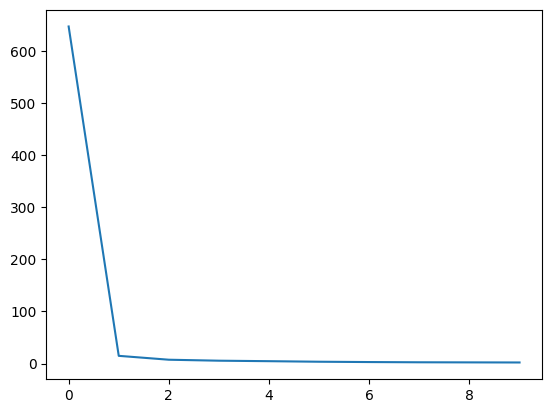

In [ ]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.1----------")
average_accuracy, c, _, _ = k_fold_cross_validation(xTrain, yTrain, k, 0.1, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

## At Learning Rate 0.01

----------K-Fold Cross Validation with 10 Folds and eta 0.01----------

Training at Iteration 1 of 10
Cost at epoch 0: 665.4538862745401
Cost at epoch 100: 162.38616033202965
Cost at epoch 200: 68.29789139108328
Cost at epoch 300: 43.00467774579584
Cost at epoch 400: 31.694198916699246
Cost at epoch 500: 25.417504621431355
Cost at epoch 600: 22.310230217833393
Cost at epoch 700: 18.83008288580367
Cost at epoch 800: 16.592845315213133
Cost at epoch 900: 14.790626161126314

Testing at Iteration 1 of 10

Accuracy at Iteration 1 of 10: 0.9794628751974723

Training at Iteration 2 of 10
Cost at epoch 0: 657.6857002655453
Cost at epoch 100: 166.05274412827526
Cost at epoch 200: 71.59160225889711
Cost at epoch 300: 45.24191531638637
Cost at epoch 400: 33.24783611849823
Cost at epoch 500: 26.78470535901446
Cost at epoch 600: 21.688775337113796
Cost at epoch 700: 19.078664838091505
Cost at epoch 800: 16.90357275557293
Cost at epoch 900: 15.287790065701989

Testing at Iteration 2 of 10

Accuracy 

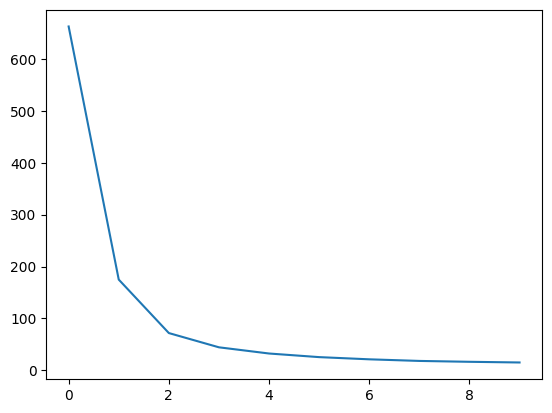

In [ ]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.01----------")
average_accuracy, c, _, _ = k_fold_cross_validation(xTrain, yTrain, k, 0.01, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

## At Learning Rate 0.001

----------K-Fold Cross Validation with 10 Folds and eta 0.001----------

Training at Iteration 1 of 10
Cost at epoch 0: 651.2225695060614
Cost at epoch 100: 622.0141901122405
Cost at epoch 200: 576.1508199151347
Cost at epoch 300: 514.5646412358229
Cost at epoch 400: 441.97871116777446
Cost at epoch 500: 370.2628179327335
Cost at epoch 600: 307.2472930277667
Cost at epoch 700: 260.14101306922163
Cost at epoch 800: 220.43004619123963
Cost at epoch 900: 190.910939357059

Testing at Iteration 1 of 10

Accuracy at Iteration 1 of 10: 0.7851500789889415

Training at Iteration 2 of 10
Cost at epoch 0: 658.3693006343367
Cost at epoch 100: 630.7145584423149
Cost at epoch 200: 585.1619156855686
Cost at epoch 300: 521.8356633402421
Cost at epoch 400: 447.44751411810694
Cost at epoch 500: 375.9802028353537
Cost at epoch 600: 314.89118806061776
Cost at epoch 700: 262.44039612788407
Cost at epoch 800: 223.6616115709815
Cost at epoch 900: 195.13683254595222

Testing at Iteration 2 of 10

Accuracy at 

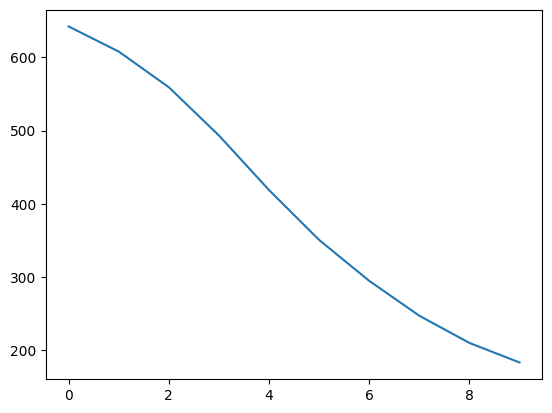

In [ ]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.001----------")
average_accuracy, c, _, _ = k_fold_cross_validation(xTrain, yTrain, k, 0.001, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

## At Learning Rate 0.0001

----------K-Fold Cross Validation with 10 Folds and eta 0.0001----------

Training at Iteration 1 of 10
Cost at epoch 0: 657.996427705905
Cost at epoch 100: 656.3806450160341
Cost at epoch 200: 654.0191164692997
Cost at epoch 300: 650.9739875537736
Cost at epoch 400: 648.2395860786074
Cost at epoch 500: 645.629475579585
Cost at epoch 600: 642.2114737356274
Cost at epoch 700: 639.4149267723893
Cost at epoch 800: 636.431943344935
Cost at epoch 900: 633.0760869890494

Testing at Iteration 1 of 10

Accuracy at Iteration 1 of 10: 0.10505529225908374

Training at Iteration 2 of 10
Cost at epoch 0: 670.6119617845128
Cost at epoch 100: 669.0583245827138
Cost at epoch 200: 667.1939599405549
Cost at epoch 300: 664.5217039534607
Cost at epoch 400: 662.2844663828702
Cost at epoch 500: 660.5443927168552
Cost at epoch 600: 658.4935916104806
Cost at epoch 700: 656.5049359921779
Cost at epoch 800: 654.0191164692995
Cost at epoch 900: 650.6011146253418

Testing at Iteration 2 of 10

Accuracy at Iterati

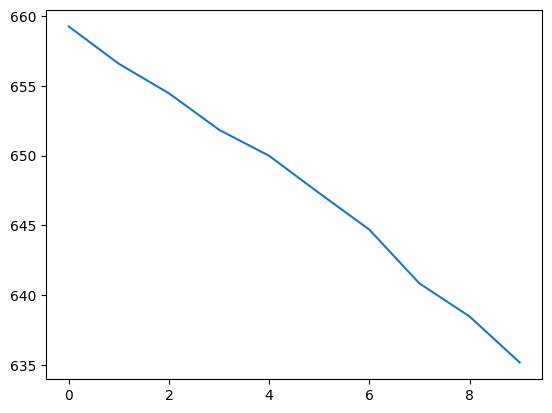

In [ ]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.0001----------")
average_accuracy, c, _, _ = k_fold_cross_validation(xTrain, yTrain, k, 0.0001, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)